# <center>Introduction on Using the language R to access and analyse a Seismic Event catalogued by GeoNet

In this tutorial we will look at the work flow from knowing the data of the Seismic Event we wish to look at to getting data on this Seismic Event. We will get a map of Seismic Events <img src="event.png" height="250" width="250"> 
Then we will get a station map <img src="station.png" height="250" width="250"> 
and we will get waveform data from one these stations <img src="waveform.png" height="250" width="250"> 

## &nbsp; Table of contents

### 1. Introduction
### 2. Set Up
### 3. Event Data
##### &nbsp; 3.1 Get Event data
##### &nbsp; 3.2 Visualising event data
### 4. Station Data
##### &nbsp; 4.1 Get Station data
##### &nbsp; 4.2 Visualising Station data
##### &nbsp;  4.3 Get Channel Data
### 5. Waveform Data
##### &nbsp; 5.1 Get Waveform data
##### &nbsp; 5.2 Visualising Waveform data
##### &nbsp; 5.3 Saving Waveform Data

## &nbsp; 1. Introduction

In this tutorial we will be learning how to use the language R to be able to access GeoNet’s seismic data. First we will look at all events that happen above a set magnitude in one day. We will then find stations near one of these events. Finally, we will get waveform data from one of these stations.  

R is a language made for statisticians by statisticians. It is an open source language which anyone can make a package for. This means that R has a lot of useful functions for all kinds of research.

This tutorial assumes that you have basic knowledge of the language R, but basic knowledge of any programming language should be sufficient to follow this tutorial.
We will be using the packages IRISSeismic (https://CRAN.R-project.org/package=IRISSeismic) and maps (https://CRAN.R-project.org/package=maps ).<br>

This tutorial will be using GeoNet's FDSN webservices. FDSN stands for Federation of Digital Seismograph Networks. Their specifications make sure there is a consistent way for people to access seismic data. 
IRIS(Incorporated Research Institutions for Seismology) also have a FDSN webservice which IRISSeismic was written for. As such some of the functions in IRISSeismic may not work on GeoNet's data.

When talking about seismic data two words will come up a lot, stream and trace<br> 
Stream : A stream may have multiple traces and it may have data from multiple sensors <br>
Trace : A trace holds continuous waveform data normally from only one sensor. 

All data will be save into R as a data frame which is much like, what would be called, a dictionary in other languages, but with a few more restrictions to the data structure. To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame

## &nbsp; 2. Set Up

###### Install the IRISSeismic and maps packages

In [2]:
install.packages("IRISSeismic")
install.packages("maps")

If not using binder to run this code you will need run this ONCE in R to install `IRISSeismic` and `maps`

In [ ]:
#library(help = "IRISSeismic")

Note this code might take some time to run but you only need to run this ONCE. 
IRISSemismic has many functions that may be useful. To see a list of them all with description run `library(help = "IRISSeismic")`

###### Import the library and set your URLs to the same as below

In [3]:
library(IRISSeismic)
library(maps)
#Near real time
nrt <- new('IrisClient', site = 'https://service-nrt.geonet.org.nz')
#Archive
acr <- new('IrisClient', site = 'https://service.geonet.org.nz')

GeoNet has two FDSN services <br>
For waveform data
an archive service holds verified data starting 7 days after collection, 
and a near real-time service holds data that could be incomplete from the last 8 days<br>
For the event and station data there is no distinction between these services 

## &nbsp; 3. Event Data

In this section we will learn how to get GeoNet’s catalogue of events using their FDSN webservices and then visualise this data. 

Event data is a catalogue of all the events such as earthquakes that the New Zealand network of seismometers have detected.
The `getEvent` function with return a R `data.frame` with column that has `eventId` `time`  `latitude` `longitude` `depth` `author` `cCatalog` `contributor` `contributorId` `magType` `magnitude` `magAuthor` and `eventLocationName.` 
Each row is a different event<br>

## &nbsp;  3.1 Get event data 

###### Set the start and end time of the data you want to select

In [4]:
starttime <- as.POSIXct("2016-11-13",tz="GMT")
endtime <-  as.POSIXct("2016-11-14", tz="GMT")

Note that time must be in UTC (Universal Time Coordinated) which is 13 or 12 hours behind nzt (New Zealand Time) (depending on daylight savings time).
Also Note that GMT or Greenwich mean time is the same time as UTC.
    In this case we are looking at the 2016 Kaikoura earthquake which happened just after midnight on 14th of November. So just after 11am on the 13th of November in UTC.
    There are online converters if needed.
    You can add to the time in number of seconds eg. `stattime + 60` would be the time 2016-11-13 00:01:00.000<br>

###### Get event data

In [5]:
events <- getEvent(acr, starttime, endtime, minmag=6)

The parameters needed are service, starttime and endtime.
    You can also look by magnitude with `minmag=` and `maxmag=`.
    You can look by depth with `mindepth=` and `maxdepth=`.
    Another parameter you can look by is magnitude type with `magtype= `.

## &nbsp; 3.2 Visualise event data

###### See the number of events

In [6]:
nrow(events)
"earthquakes found with magnitude > 6"

[1] 5

[1] "earthquakes found with magnitude > 6"

###### Plot the map

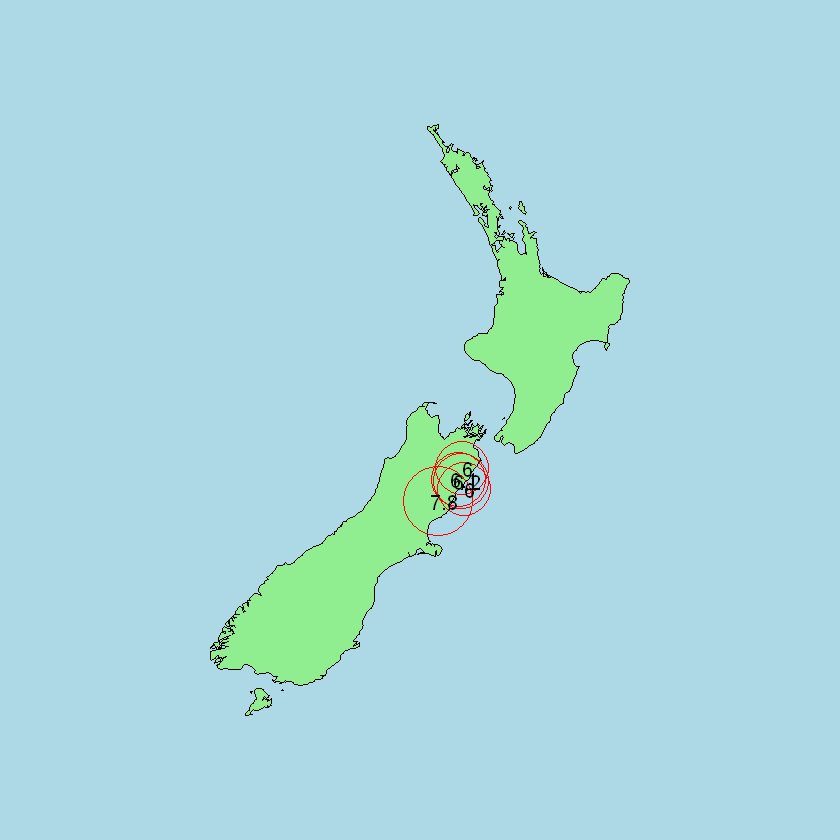

In [7]:
map("nz", fill=TRUE, col="lightgreen", bg= "light blue")
points(events$longitude, events$latitude, pch=1, cex=events$magnitude, col='red')
labels <- paste(" ", as.character(round(events$magnitude,1)))
text(events$longitude, events$latitude, labels=labels, cex=1)

The function `map` makes the base map. The function `points` makes a point for each event.
    The point is given an x,y coordinate of its longitude and latitude.
    The function`pch` say what shape will be plotted `pch=1` say the shape will be circle with its centre on the point.
    The function `cex` say the size of the shape will be. In the code above this is set to the magnitude of the event.
If you right click on this plot in the notebook you can save it

This map shows all of nz but the events are all in one place so I want to "zoom in"

###### Set parameters for map

In [8]:
xhigh <- max(events$longitude)+ .5
xlow <- min(events$longitude)- .5
yhigh <- max(events$latitude)+ .5
ylow <- min(events$latitude)- .5

We can take the maximum longitude shown on the map to the maximum longitude of all the events and the same for minimum and latitude. 
So that the data is not on the edge of the map we can make sure all points are at least 0.5 from the edge of the map by modifying the maximum and minimum,longitude and latitude by 0.5. 

###### Plot the map with x,y parameters

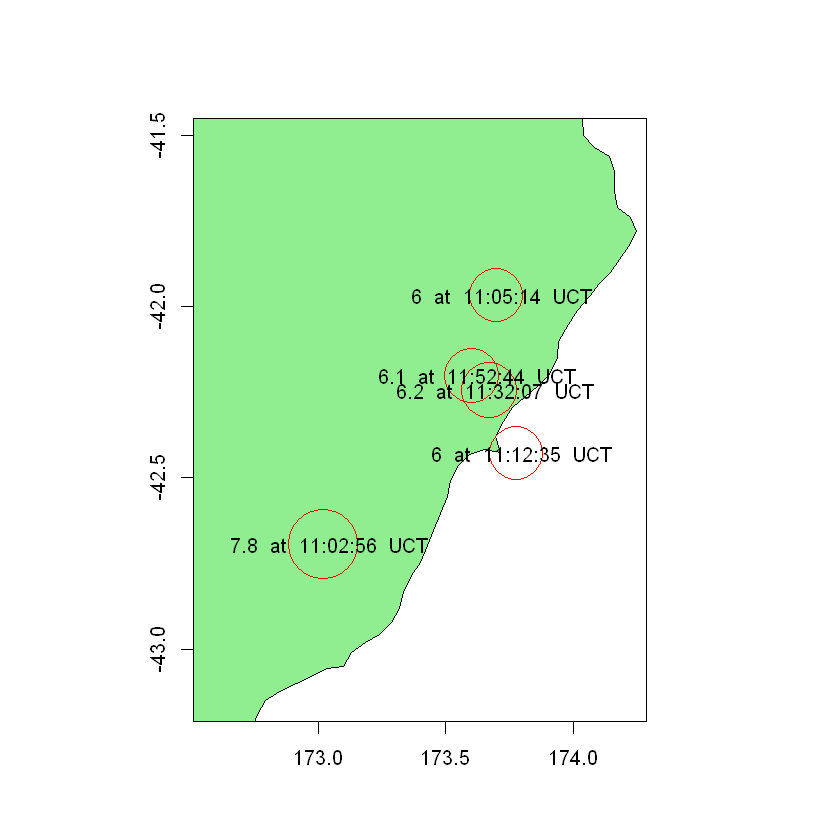

In [9]:
map('nz',xlim=c(xlow,xhigh),ylim=c(ylow,yhigh), fill=TRUE, col="lightgreen")
points(events$longitude, events$latitude, pch=1, cex=events$magnitude, col='red')
labels <- paste(" ", as.character(round(events$magnitude,1))," at ", substr(as.character(events$time), 12, 20), " UCT")
text(events$longitude, events$latitude, labels=labels, cex=1)
map.axes()

`map` makes the base map using the longitude and latitude as found above.
    The label now has the time of the event done by taking a sub-string of the time of the event.
    If you right click on this plot in the notebook you can save it.
For more about what you can do with maps go to http://www.geog.uoregon.edu/GeogR/ or run `library(help ="maps")`

###### Look at the first event in our list of events

In [10]:
events[1,]

,eventId,time,latitude,longitude,depth,author,cCatalog,contributor,contributorId,magType,magnitude,magAuthor,eventLocationName
3,2016p858000,2016-11-13 11:02:56,-42.693,173.022,15.1,GNS,GNS,GNS,2016p858000,Mw(mB),7.8,GNS,15 km north-east of Culverden


Events are ordered by event ID which is generated by the time of the event. 

## &nbsp; 4. Station Data

In this section we will learn how to find stations and what instruments they have.

Station data is an inventory of metadata from the stations 
The `getStation` function with return a R `data.frame` with columns `network` `station` `latitude` `longitude` `elevation` `sitename` `starttime` `endtime`. Where `startime` is the date of the stations installation and `endtime` is the date of that the station stopped running. Note if `endtime` is NA then the station is still running.

## &nbsp;  4.1 Get Station Data

###### Get data out of this event

In [11]:
time <- events[1,]$time
lat <- events[1,]$latitude
lon <- events[1,]$longitude

This gets some of the data about the frist event and renames to make it easier to call later in the notebook. 

###### Find station close to the event

In [12]:
station<- getStation(acr,"NZ", "*","*", "*",starttime ,endtime, latitude= lat, longitude= lon ,maxradius = 0.5)

The parameters needed are service, network, station, location, channel, starttime, and endtime.
     The `*` is a wildcard character that says that value can be anything
    Optional parameters are `latitude` `longitude` `maxradius` and `minradius`.
    Here `latitude` and `longitude` are the latitude and longitude of the event. 

## &nbsp;  4.1 Visualising Station Data

###### Set longitude and latitude for the map

In [13]:
xhigh <- max(station$longitude)+ .3
xlow <- min(station$longitude)- .3
yhigh <- max(station$latitude)+ .3
ylow <- min(station$latitude)- .3

Done the same as in part 3.2. 

###### Map the stations

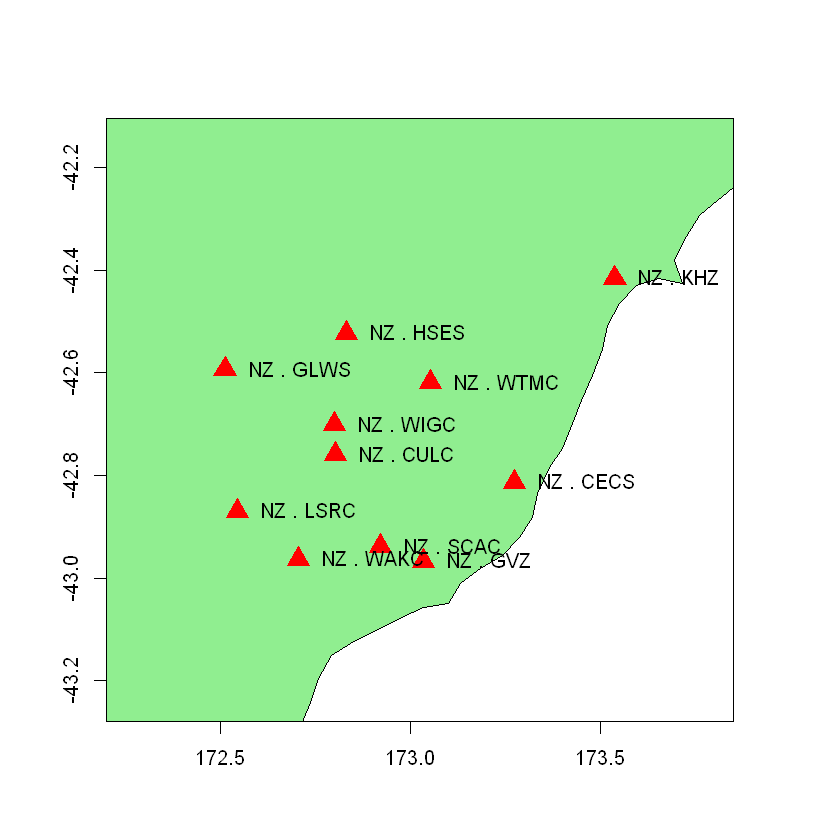

In [14]:
map("nz",xlim=c(xlow,xhigh),ylim=c(ylow,yhigh), fill=TRUE, col="lightgreen")
points(station$longitude, station$latitude, pch=17, cex=2, col='red')
labels <- paste(" ", station$network, ".",station$station)
text(station$longitude, station$latitude, labels=labels, cex=1, pos=4)
map.axes()

`map` makes the base map using the longitude and latitude as found above.
`pch` say what shape will be plotted` pch=17` say the shape will be triangle.
If you right click on this plot in the notebook you can save it.
For more about what you can do with maps go to http://www.geog.uoregon.edu/GeogR/ or run `library(help ="maps")`


###### Print station data

In [15]:
station

network,station,latitude,longitude,elevation,sitename,starttime,endtime
NZ,CECS,-42.81349,173.2749,69.0,Cheviot Emergency Centre,2002-02-23,NA
NZ,CULC,-42.75944,172.8026,206.0,Culverden Airlie Farm,2005-11-15,NA
NZ,GLWS,-42.59417,172.5110,445.0,Glyn Wye,2002-10-17,NA
NZ,GVZ,-42.96737,173.0348,400.5,Greta Valley,2012-12-03,NA
NZ,HSES,-42.52324,172.8305,377.0,Hanmer Springs Emergency Centre,2002-02-24,NA
NZ,KHZ,-42.41598,173.5390,64.0,Kahutara,1988-12-08,NA
NZ,LSRC,-42.86952,172.5433,335.0,Lake Sumner Road,2004-11-28,NA
NZ,SCAC,-42.93857,172.9216,138.0,Scargill,2005-11-16,NA
NZ,WAKC,-42.96310,172.7052,219.0,Waikari,2005-11-14,NA
NZ,WIGC,-42.70119,172.8003,247.0,Waiau Gorge,2004-11-27,NA


Stations are ordered by network name then station name

## &nbsp;  4.3 Get Channel Data

Channel data is a inventory of metadata from the stations with some extra data to the station data set. 
The `getChannel` function with return a R `data.frame` with columns `network` `station` `location` `channel` `latitude` `longitude` `elevation` `depth` `azimuth` `dip` `instrument` `scale` `scalefreq` `scaleunits` `samplerate` `starttime` `endtim` and `snclId`. Where `startime` and `endtime` are the same as for the station data.

###### Get the names of the station

In [16]:
name<- station[1,]$station

This gets the name of the first station and renames to make it easier to call later in the notebook. 

###### Get Channel data

In [17]:
channels<-getChannel(acr,"NZ",name,"*", "*", starttime, endtime)

The parameters needed are service, network, station, location, channel, starttime, and endtime.
     The `*` is a wildcard character that says that value can be anything.
    Optional parameters are `latitude` `longitude` `maxradius` and `minradius`.

###### See the number of channels

In [18]:
channels[1,]$station
"has"
nrow(channels)
"Channels"

[1] "CECS"

[1] "has"

[1] 6

[1] "Channels"

###### Print channel data

In [19]:
channels

,network,station,location,channel,latitude,longitude,elevation,depth,azimuth,dip,instrument,scale,scalefreq,scaleunits,samplerate,starttime,endtime,snclId
2,NZ,CECS,20,BN1,-42.81349,173.2749,69,0,6,0,Accelerometer,427336.1,1,m/s**2,50,2014-12-16 00:30:00,NA,NZ.CECS.20.BN1
3,NZ,CECS,20,BN2,-42.81349,173.2749,69,0,96,0,Accelerometer,427336.1,1,m/s**2,50,2014-12-16 00:30:00,NA,NZ.CECS.20.BN2
1,NZ,CECS,20,BNZ,-42.81349,173.2749,69,0,0,-90,Accelerometer,427336.1,1,m/s**2,50,2014-12-16 00:30:00,NA,NZ.CECS.20.BNZ
5,NZ,CECS,20,HN1,-42.81349,173.2749,69,0,6,0,Accelerometer,427336.1,1,m/s**2,200,2014-12-16 00:30:00,NA,NZ.CECS.20.HN1
6,NZ,CECS,20,HN2,-42.81349,173.2749,69,0,96,0,Accelerometer,427336.1,1,m/s**2,200,2014-12-16 00:30:00,NA,NZ.CECS.20.HN2
4,NZ,CECS,20,HNZ,-42.81349,173.2749,69,0,0,-90,Accelerometer,427336.1,1,m/s**2,200,2014-12-16 00:30:00,NA,NZ.CECS.20.HNZ


What the channel code means can be found at https://www.geonet.org.nz/data/supplementary/channels.

## &nbsp; 5. Waveform Data

In this section we will learn how to get and plot GeoNet waveform data.

Waveform data is the raw data that has be collected by the sensors. 
`getDataselect` gets a stream of data as a R `data.frame` with columns `url` `requestedStarttime` `requestedEndtime` `act_flags` `io_flags` `dq_flags` `timing_qual` and `traces`.
Traces has the traces that are in the stream. Traces is a `data.frame` with columns `stats` `sensor` `InstrumentSensitivity` `SensitivityFrequency` `InputUnits` and `data`. 
Data is the raw data in a list format

## &nbsp; 5.1 Get Waveform Data

###### Set the time  you want to look at

In [20]:
event_time <- as.POSIXct( time , tz="GMT")
start <- event_time
end <- event_time+300

This picks the time to look at based off the time of the event. This time must be in UTC

###### Get the waveform data

In [21]:
station_Z<- getDataselect(acr,"NZ", name ,"*", "B?Z", start ,end)
station_1<- getDataselect(acr,"NZ", name ,"*", "B?1", start ,end)
station_2<- getDataselect(acr,"NZ", name ,"*", "B?2", start ,end)

The parameters needed are service, network, station, location, channel, starttime, and endtime.
The * is a wildcard character that says it will look for data with any location code.
The ? is a wildcard character for only a single character.

## &nbsp; 5.2 Visualising  Waveform Data

Visualise the data from the 50 Hz Strong motion sensors at station CECS

###### Plot data

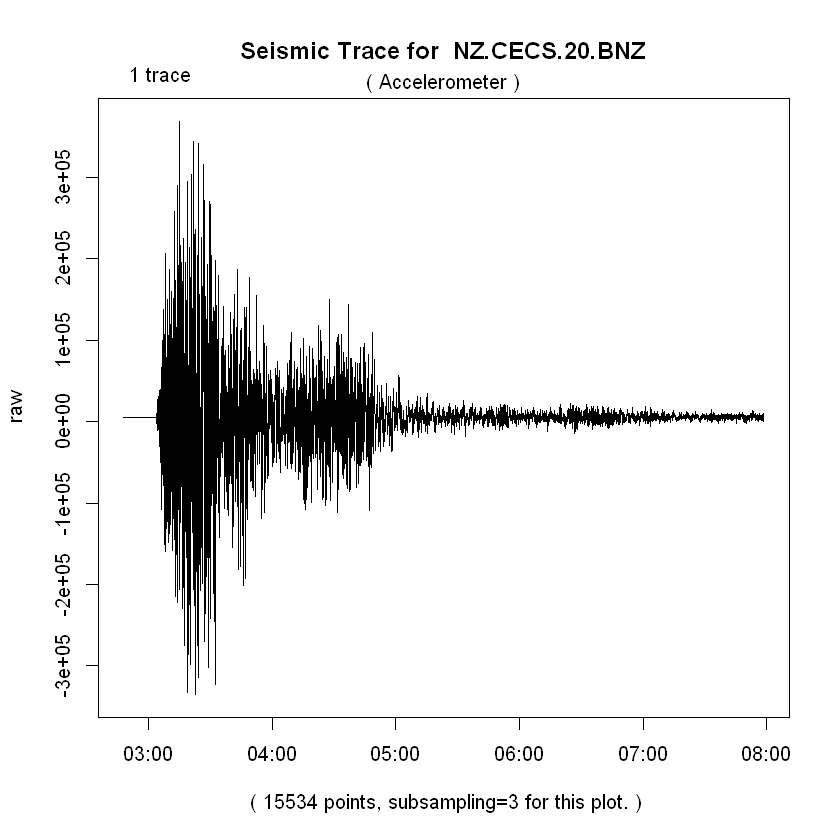

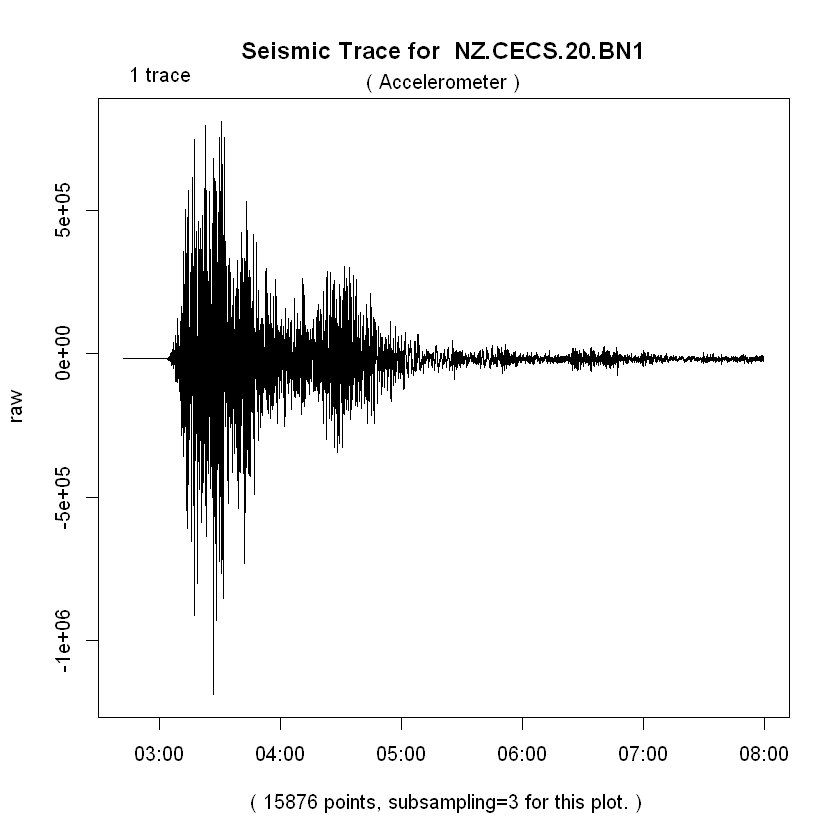

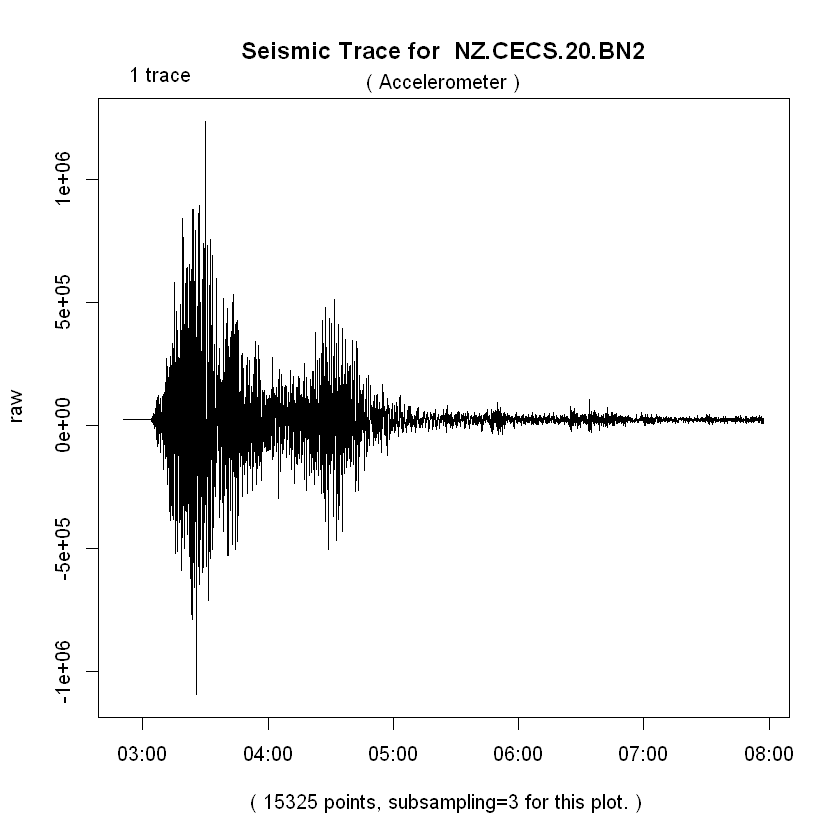

In [22]:
plot(station_Z)
plot(station_1)
plot(station_2)

Most parameters that you can give `plot` in R normally should work on this data set. 
To find out what these are and there description go to https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/plot . 
Note that time is shown in minutes on the x axis, where the point x=03:00 is 2016-11-13 11:03:00.000. 
For data sets over longer time periods time may be shown in hours or even days.
If you right click on this plot in the notebook you can save it.

## &nbsp; 5.3 Saving Waveform Data

In [23]:
tr <- station_1@traces[[1]]#tack the trace out of the stream. in this case we only have one
data_1 <- slot(tr,"data")
write.csv(data_1, file="data_1.csv") 

The above code gets the trace from the stream, then gets the waveform data from the trace and finally saves it as `data_1.csv`.
The file will be saved in the same folder as this code is run from.

## Useful links. 

<ul>
<li>More on how to get seismic data can be found in the notebooks at https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/R
<li> There is a station search at https://www.geonet.org.nz/data/network/sensor/search 
<li> To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
<li>IRISSeismic has a lot of functions that could be useful. Documentation of them with examples can be found at https://cran.r-project.org/web/packages/IRISSeismic/IRISSeismic.pdf
<li>To find out more about R go to https://www.r-project.org/
<li>To understand more about data frames go to https://www.rdocumentation.org/packages/base/versions/3.5.1/topics/data.frame 
<li>To understand more about plots in R go to https://www.rdocumentation.org/packages/graphics/versions/3.5.1/topics/plot
<li> To understad more about maps in R go to https://cran.r-project.org/web/packages/maps/maps.pdf
<li> To learn more about what maps can be made in R go to http://www.geog.uoregon.edu/GeogR/
<li> To learn more about station codes go to https://www.geonet.org.nz/data/supplementary/channels
<li> For how to do all of this in python go to https://github.com/GeoNet/data-tutorials/tree/master/Seismic_Data/Python